# Customer-Churn-Prediction-using-ANN

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
df = pd.read_csv('Churn_Modelling (1).csv',index_col='RowNumber')

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.size

130000

In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Geography']= df['Geography'].map({'France':0,'Germany':1,'Spain':2})
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

In [ ]:
df_encoded = df

In [ ]:
df_encoded

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,0,36,7,0.00,1,0,1,42085.58,1


# Exploratory Data Analysis (EDA)

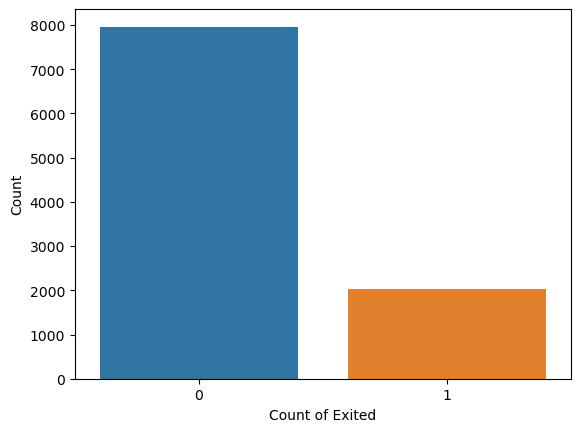

In [ ]:
sns.countplot(x=df_encoded['Exited'])
plt.xlabel('Count of Exited')
plt.ylabel('Count')
plt.show()

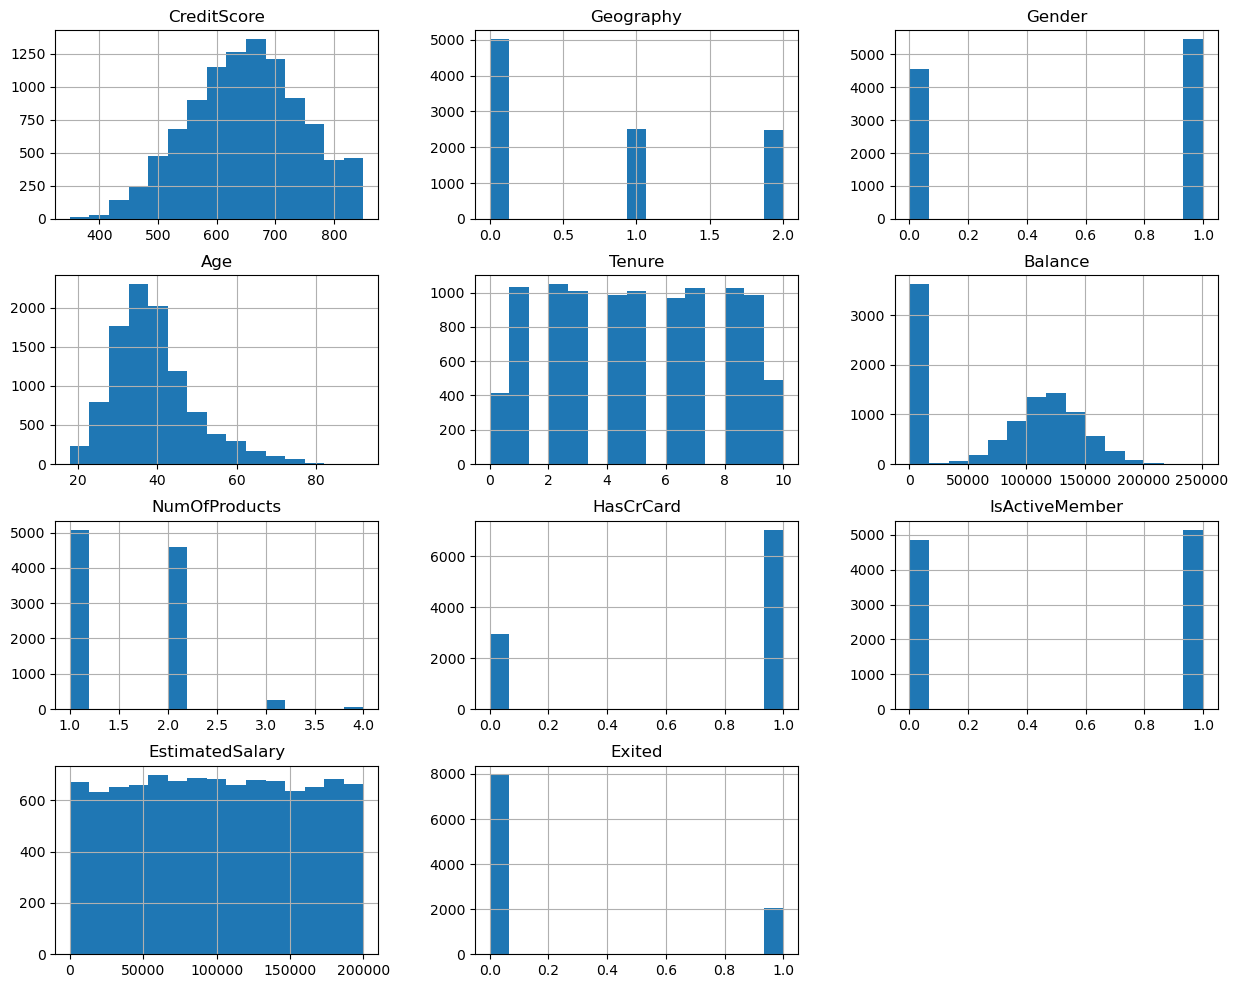

In [ ]:
# distribution of all features
df_encoded.hist(figsize=(15,12), bins=15)
plt.title("Features Distribution")
plt.show()

<Axes: >

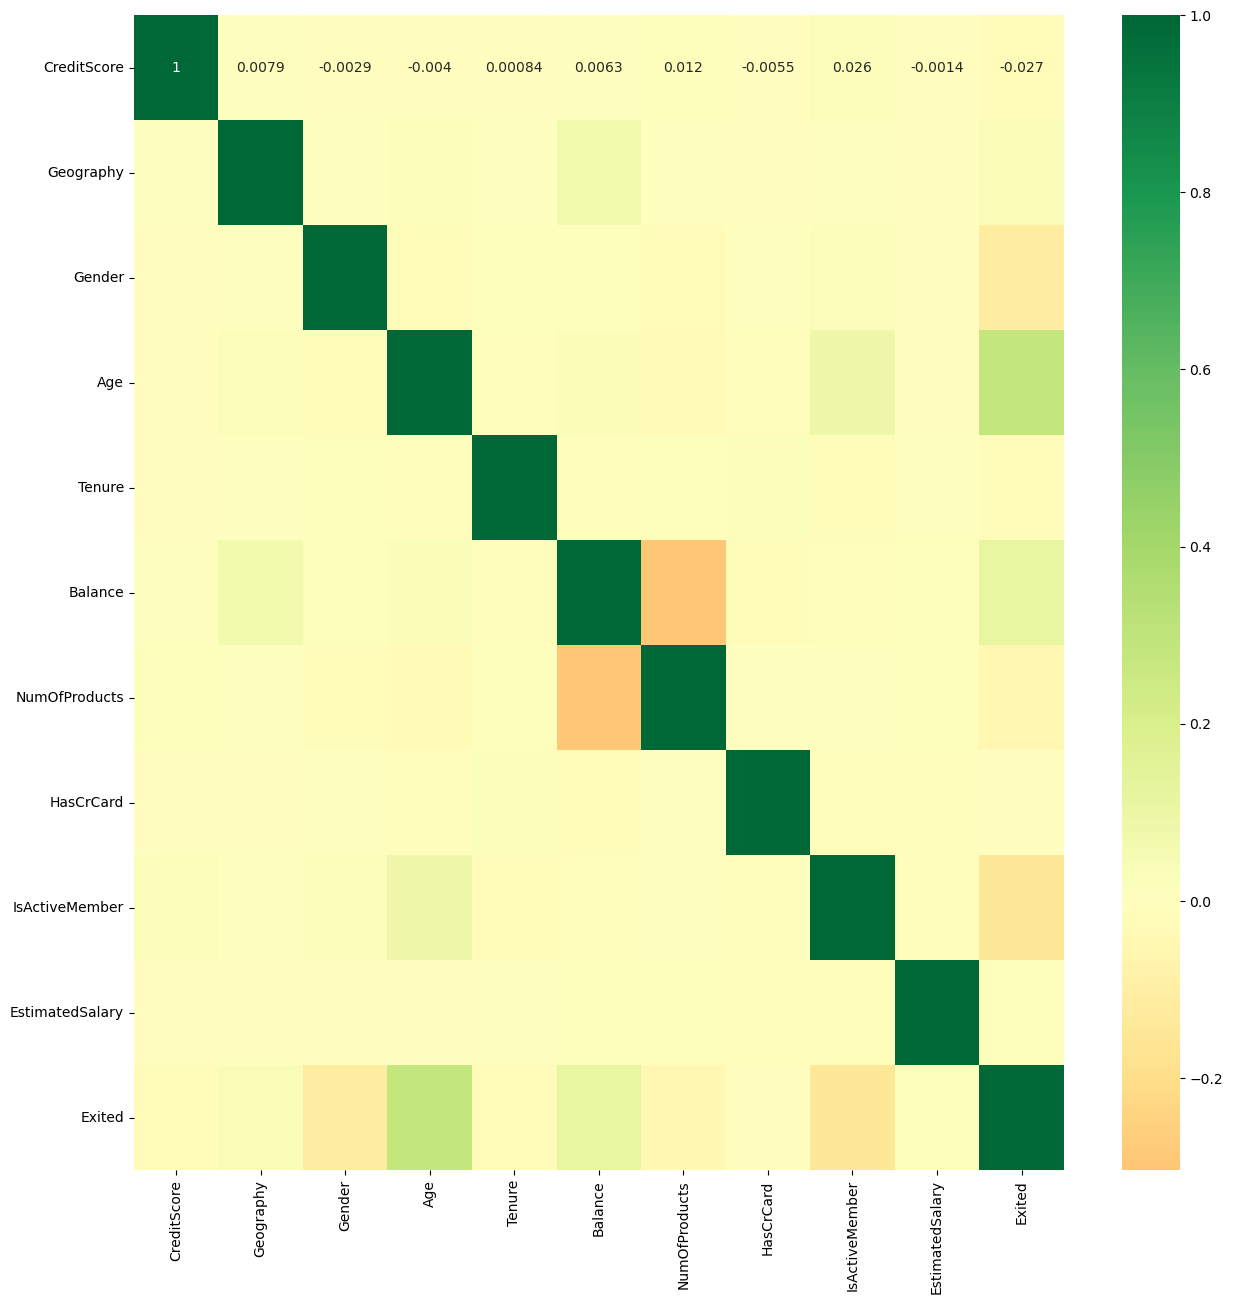

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_encoded.corr(), annot=True, cmap="RdYlGn", center=0)

# Train, Test, Split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
x = df_encoded.drop(['Exited'], axis=1)
y = df_encoded.Exited

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88
2,608,2,0,41,1,83807.86,1,0,1,112542.58
3,502,0,0,42,8,159660.80,3,1,0,113931.57
4,699,0,0,39,1,0.00,2,0,0,93826.63
5,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
# Splitting the dataset into the Training set and Test sets

x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [ ]:
# Sequential model to initialize our ANN and Dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Feature scaling because yes we don't want one independent variable dominating the other and it makes computations easy
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# ANN Model for Classfication

In [ ]:
x_train.shape

(8000, 10)

In [ ]:
model = Sequential([
    Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=10),
    Dense(units=6, kernel_initializer='uniform', activation='relu'),
    Dense(units=1, kernel_initializer='uniform', activation='sigmoid'),])


C:\Users\Saras\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=10, epochs=100, verbose=0)

In [ ]:
history.history

{'accuracy': [0.7960000038146973,
  0.7960000038146973,
  0.7960000038146973,
  0.8199999928474426,
  0.8264999985694885,
  0.8261250257492065,
  0.8373749852180481,
  0.8421249985694885,
  0.8453750014305115,
  0.846750020980835,
  0.8482499718666077,
  0.8483750224113464,
  0.8487499952316284,
  0.8513749837875366,
  0.8527500033378601,
  0.8517500162124634,
  0.8526250123977661,
  0.8548750281333923,
  0.8547499775886536,
  0.8511250019073486,
  0.8542500138282776,
  0.8531249761581421,
  0.8532500267028809,
  0.8533750176429749,
  0.8539999723434448,
  0.8547499775886536,
  0.8533750176429749,
  0.8542500138282776,
  0.856374979019165,
  0.8556249737739563,
  0.8553749918937683,
  0.8523749709129333,
  0.8517500162124634,
  0.8531249761581421,
  0.8572499752044678,
  0.8538749814033508,
  0.8551250100135803,
  0.8571249842643738,
  0.8588749766349792,
  0.859250009059906,
  0.8585000038146973,
  0.8575000166893005,
  0.8577499985694885,
  0.8600000143051147,
  0.8567500114440918,
 

# Score and Metrics

In [ ]:
score, acc = model.evaluate(x_train, y_train,batch_size=10)
print('Train score', score)
print('Train accuracy', acc)

800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.8600 - loss: 0.3437
Train score 0.34671956300735474
Train accuracy 0.8586249947547913


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

accuracy_score(y_test,y_pred)

0.855

Text(0.5, 23.52222222222222, 'Prediction label')

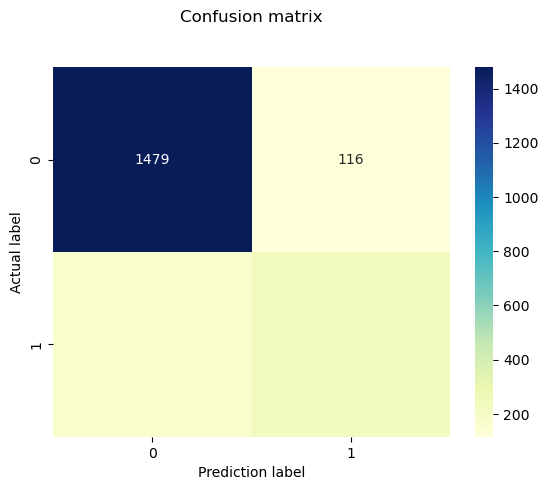

In [ ]:
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Prediction label')

In [ ]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.67      0.57      0.61       405

    accuracy                           0.85      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step


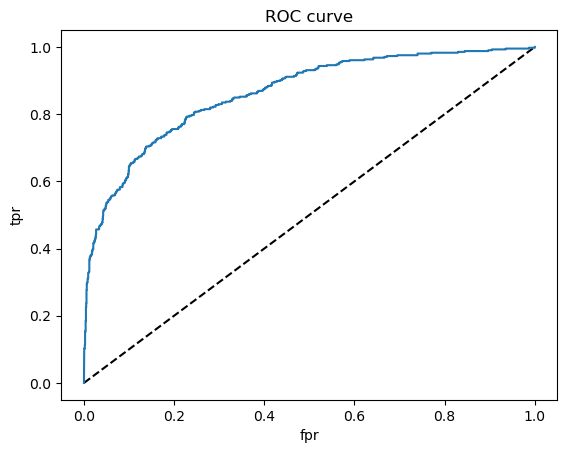

In [ ]:
from sklearn.metrics import roc_curve

# Predict probabilities using the model
y_pred_proba = model.predict(x_test)

# Assuming y_test is binary (0 and 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Predictive system

In [ ]:
x_test_reshaped = x_test[5].reshape(1, -1)
result = model.predict(x_test_reshaped)
(result > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1]])

In [ ]:
y_test.iloc[5]

1

In [ ]:
import pandas as pd
import numpy as np

def pred(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary):
    features = np.array([CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary])
    features = features.reshape(1, -1)  # Reshape to (1, input_dim)
    result = model.predict(features)
    result = (result > 0.5).astype(int)
    return result

In [ ]:
# Example usage:
CreditScore = 619
Geography = 0
Gender = 0
Age = 42
Tenure = 2
Balance = 0.0
NumOfProducts = 1
HasCrCard = 1
IsActiveMember = 1
EstimatedSalary = 101348.88

result = pred(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[0]]


In [ ]:
if result == 1:
    print("Churn")
else:
    print("Not Churn")

Not Churn


In [ ]:
df.iloc[0]

CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Exited                     1
Name: 1, dtype: object

# Save Model

In [ ]:
model.save('model.h5')